In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

from scipy import stats as stats
from matplotlib import pylab
from pylab import *

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

PART 1

In [149]:
df1 = pd.read_excel(r"C:\Users\dmoha\Downloads\housing.xlsx")
df = df1.dropna()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


From Raschka chapter 10
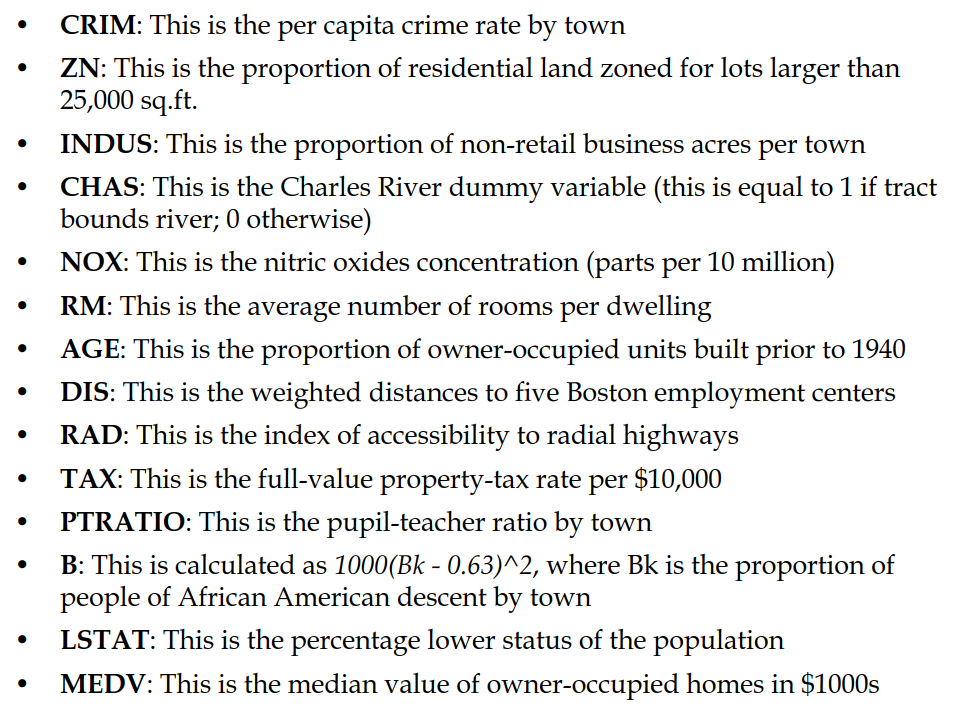

In [150]:
summary = df.describe()
print(summary)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   12.721239   10.304889    0.077434    0.540816    6.343538   
std      2.495894   24.326032    6.797103    0.267574    0.113816    0.666808   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000    5.926750   
50%      0.191030    0.000000    8.140000    0.000000    0.519000    6.229000   
75%      1.211460   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    65.557965    4.043570    7.823009  377.442478   18.247124  369.826504   
std     28.127025    2.0904

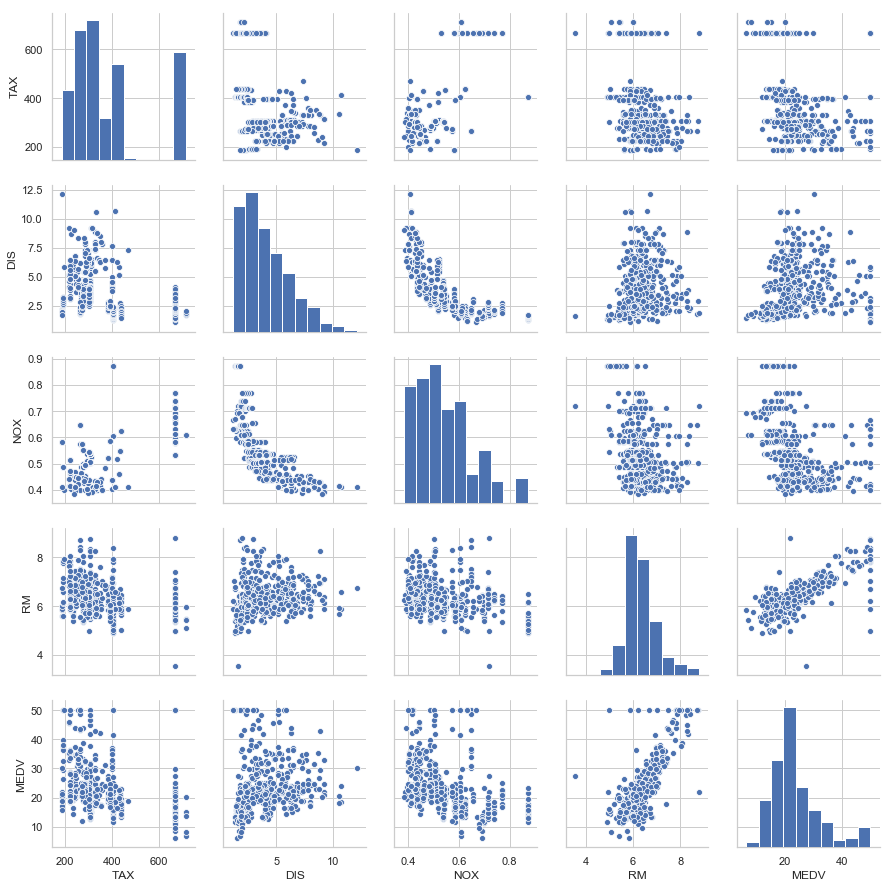

In [151]:
#Code from Raschka Chapter 10
sns.set(style='whitegrid', context='notebook')
cols = ['TAX', 'DIS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5);
plt.show()

#This shows the relationships between 5 features: TAX, DIS, NOX, RM, and MEDV. From these plots a couple trends can be inferred:
#DIS and NOX, MEDV and RM, 

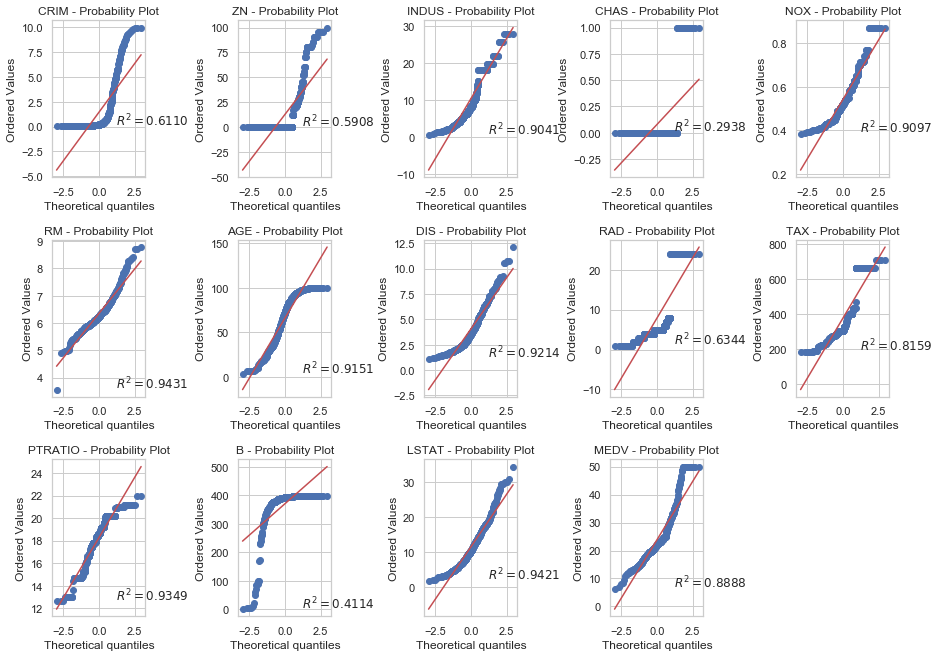

In [152]:
column_list = df.columns.values.tolist()

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=1)

for i in range(1,15):
    plt.subplot(4, 5, i)
    x = df.iloc[:,i-1]
    ax = stats.probplot(x, dist="norm", plot=pylab, rvalue=True)
    plt.title(column_list[i-1] + " - Probability Plot")
    

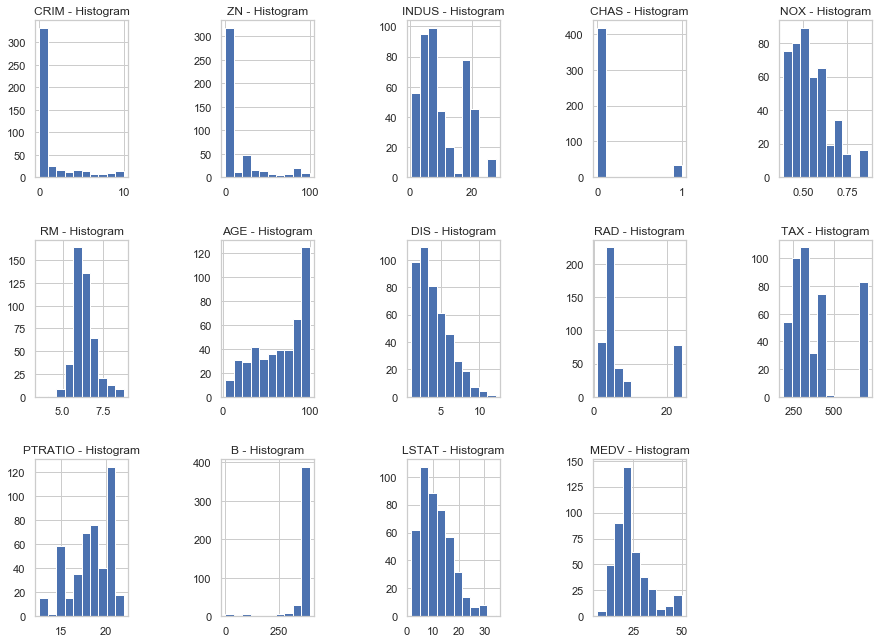

In [153]:
column_list = df.columns.values.tolist()

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=1)

for i in range(1,15):
    plt.subplot(4, 5, i)
    x = df.iloc[:,i-1]
    ax = plt.hist(x)
    plt.title(column_list[i-1] + " - Histogram")
    

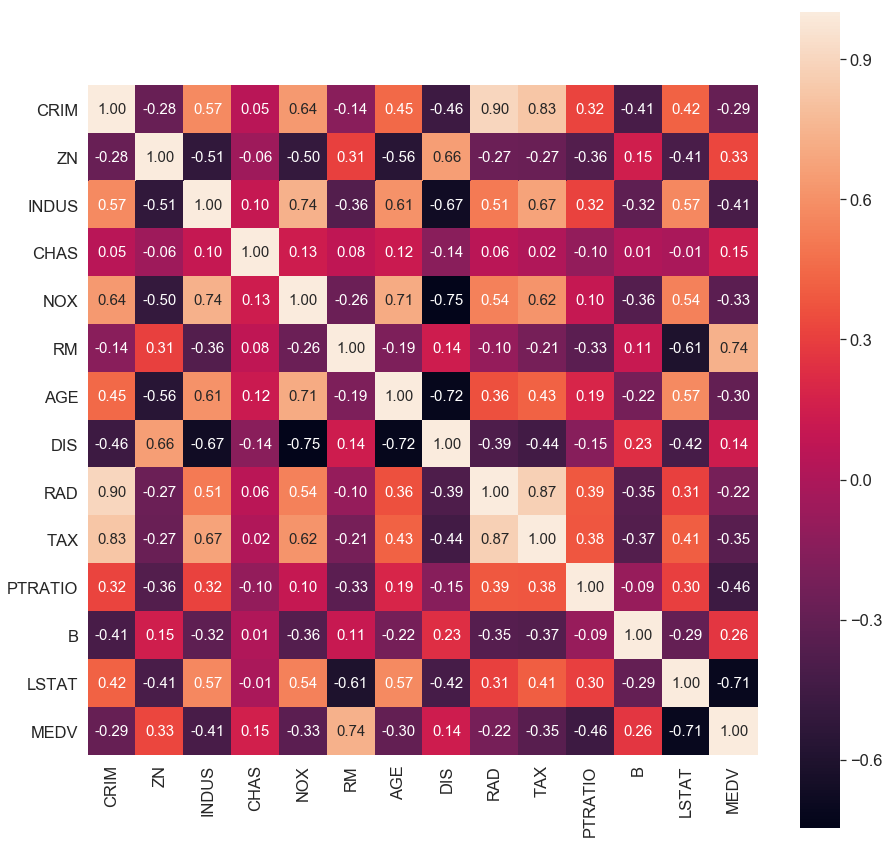

In [154]:
column_list = df.columns.values.tolist()
cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(15,15)) 
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=column_list[:],
            xticklabels=column_list[:])
plt.show()

#This shows a correlation matrix of all the features, notably:  

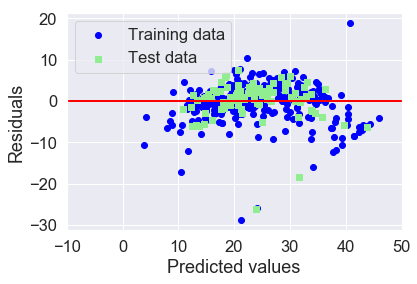

R^2: 0.6976755382220081
Root Mean Squared Error: 4.579877160904839
Model intercept: 
20.4002077093167
Model coefficients: 
    Feature  coef_value
0      CRIM   -0.210978
1        ZN    0.030333
2     INDUS    0.052174
3      CHAS    1.786470
4       NOX  -11.626123
5        RM    5.318016
6       AGE   -0.020678
7       DIS   -1.339786
8       RAD    0.248794
9       TAX   -0.009310
10  PTRATIO   -0.878367
11        B    0.013671
12    LSTAT   -0.479319


In [155]:
#Evaluating the performance of linear regression models
#Code derived from Raschka chapter 10
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.2, random_state=42)

slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, 
             c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
             c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

# Compute and print R^2 and RMSE 
# code derived from DataCamp
y_pred = slr.predict(X_test)
print("R^2: {}".format(slr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print("Model intercept: ")
print(slr.intercept_)
print("Model coefficients: ")
df2 = pd.DataFrame()
df2['Feature'] = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df2['coef_value'] = slr.coef_
print(df2)


PART 3

In [156]:
#Code derived from DataCamp
def display_plot(cv_scores, cv_scores_std, plot_title):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    
    xmax = cv_scores[numpy.argmax(cv_scores_std)]
    print("Alpha value where R^2 maximizes:")
    print(xmax)
    
    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    ax.set_title(plot_title)
    plt.show()

Alpha value where R^2 maximizes:
0.5366916503443487


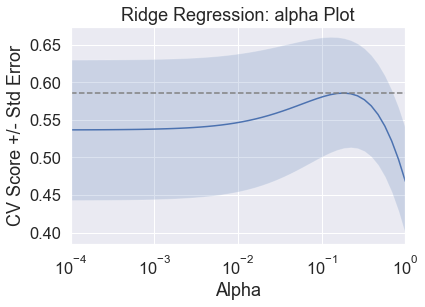

In [157]:
#Code derived from DataCamp

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []
# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)
# Compute scores over range of alphas
for alpha in alpha_space:
    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha 
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
# Display the plot
ridge_title =  "Ridge Regression: alpha Plot"
display_plot(ridge_scores, ridge_scores_std, ridge_title)

#Through hyperparameter tuning, an Alpha of ~0.5367 is found to make our ridge regression model most accurate in terms of R^2

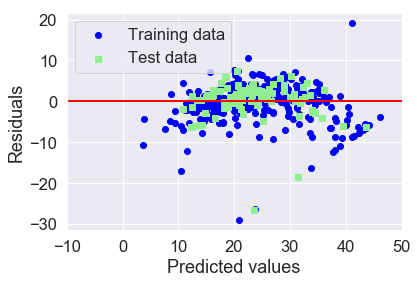

Ridge Regression R^2: 0.697384147371747
Ridge Regression Root Mean Squared Error: 4.582083751928556
Model intercept: 
17.531682266816325
Model coefficients: 
    Feature  coef_value
0      CRIM   -0.250076
1        ZN    0.031637
2     INDUS    0.036276
3      CHAS    1.715955
4       NOX   -7.804972
5        RM    5.354583
6       AGE   -0.023637
7       DIS   -1.287452
8       RAD    0.248463
9       TAX   -0.009688
10  PTRATIO   -0.832040
11        B    0.013885
12    LSTAT   -0.481910


In [158]:
#Evaluating the performance of ridge linear regression model
#Code derived from Raschka chapter 10
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

slr = Ridge(alpha = 0.5366916503443487)
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, 
             c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
             c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

# Compute and print R^2 and RMSE 
# code derived from DataCamp
y_pred = slr.predict(X_test)
print("Ridge Regression R^2: {}".format(slr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Ridge Regression Root Mean Squared Error: {}".format(rmse))
print("Model intercept: ")
print(slr.intercept_)
print("Model coefficients: ")
df3 = pd.DataFrame()
df3['Feature'] = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df3['coef_value'] = slr.coef_
print(df3)

PART 3.2

Alpha value where R^2 maximizes:
-0.45668321097745573


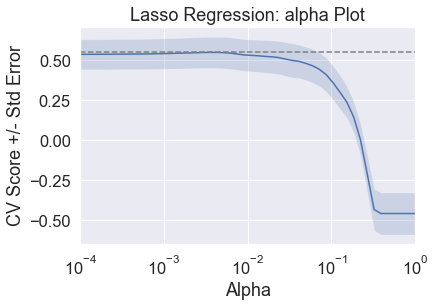

In [159]:
#Code derived from DataCamp
alpha_space = np.logspace(-4, 0, 50)
lasso_scores = []
lasso_scores_std = []
# Create a ridge regressor: ridge
lasso = Lasso(normalize = True)
# Compute scores over range of alphas
for alpha in alpha_space:
    # Specify the alpha value to use: ridge.alpha
    lasso.alpha = alpha 
    # Perform 10-fold CV: ridge_cv_scores
    lasso_cv_scores = cross_val_score(lasso, X, y, cv=10)
    # Append the mean of ridge_cv_scores to ridge_scores
    lasso_scores.append(np.mean(lasso_cv_scores))
    # Append the std of ridge_cv_scores to ridge_scores_std
    lasso_scores_std.append(np.std(lasso_cv_scores))
# Display the plot
lasso_title = "Lasso Regression: alpha Plot"
display_plot(lasso_scores, lasso_scores_std, lasso_title)

#Through hyperparameter tuning, an Alpha of ~0.5367 is found to make our ridge regression model most accurate in terms of R^2

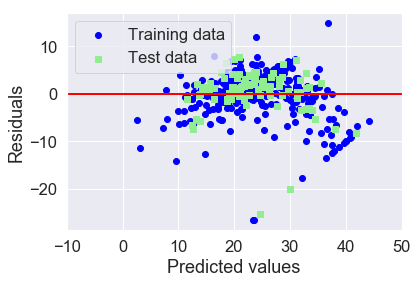

Lasso Regression R^2: 0.6834348027819013
Lasso Regression Root Mean Squared Error: 4.6865015956234535
Model intercept: 
19.907857872988416
Model coefficients: 
    Feature  coef_value
0      CRIM   -0.000000
1        ZN    0.032974
2     INDUS    0.000000
3      CHAS    0.000000
4       NOX   -0.000000
5        RM    4.043324
6       AGE   -0.010001
7       DIS   -0.933095
8       RAD    0.179524
9       TAX   -0.011088
10  PTRATIO   -0.732630
11        B    0.014495
12    LSTAT   -0.606428


In [160]:
#Evaluating the performance of ridge linear regression model
#Code derived from Raschka chapter 10
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha = 0.45668321097745573)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, 
             c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
             c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

# Compute and print R^2 and RMSE 
# code derived from DataCamp
y_pred = lasso.predict(X_test)
print("Lasso Regression R^2: {}".format(lasso.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Lasso Regression Root Mean Squared Error: {}".format(rmse))
print("Model intercept: ")
print(lasso.intercept_)
print("Model coefficients: ")
df4 = pd.DataFrame()
df4['Feature'] = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df4['coef_value'] = lasso.coef_
print(df4)

In [1]:
print("My name is David Mohammadi")
print("My NetID is: dmohamm2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is David Mohammadi
My NetID is: dmohamm2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
